In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('preprocessed_data.csv')
df.head()

X = df[['Open','High','Low','Close','Adj Close','Volume','year','month','day']]
y = df[['Target']]

In [3]:
# 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

As this is a binary classification model, I will use below methods to measure the accuracy:

1. First Method: `Logistic Regression` is used to map predicted values to probabilities. The output is always between 0 ans 1, which makes it suitable for binary classification.

In [26]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

c:\Users\swati\anaconda3\envs\DS_Projects\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [27]:
#get feature importance
importance = model.coef_[0]

# Create a DataFrame for visualization
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': importance})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

print(feature_importance)

     Feature    Importance
6       year  4.446969e-05
3      Close  1.809202e-06
4  Adj Close  1.809202e-06
8        day  4.890908e-07
2        Low  3.109999e-07
1       High  1.549671e-07
5     Volume -1.134431e-09
7      month -5.097740e-08
0       Open -1.370261e-06


- year (4.446969e-05): The year feature has a positive coefficient, suggesting that as the year increases, the likelihood of the target being true slightly increases.
- Close (1.809202e-06): The closing price has a very small positive coefficient, indicating a minimal positive impact on the target variable.
- Open (-1.370261e-06): The opening price has a small negative coefficient, suggesting a slight negative impact on the target variable.
- Volume (-1.134431e-09): The volume has a very small negative coefficient, indicating a negligible impact on the target variable.

In [28]:
#Now predict
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

In [29]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f'Accuracy: {accuracy:.2f}')
print(f'ROC-AUC: {roc_auc:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.51
ROC-AUC: 0.54
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.29      0.38       132
           1       0.49      0.75      0.59       120

    accuracy                           0.51       252
   macro avg       0.52      0.52      0.49       252
weighted avg       0.53      0.51      0.48       252



- Precision indicates how many of the positive predictions were actually correct. For this case, precision values for class 1 is less than 50%
- Recall shows how many of the actual positives were correctly identified. The recall value is 0.29 for class 0 means that out of all actual instances of class 0, the model correctly identified 29% of them. It is very low
- The ROC-AUC score of 0.54 indicates that the model's ability to distinguish between classes is only slightly better than random guessing(Random guessing is .50).

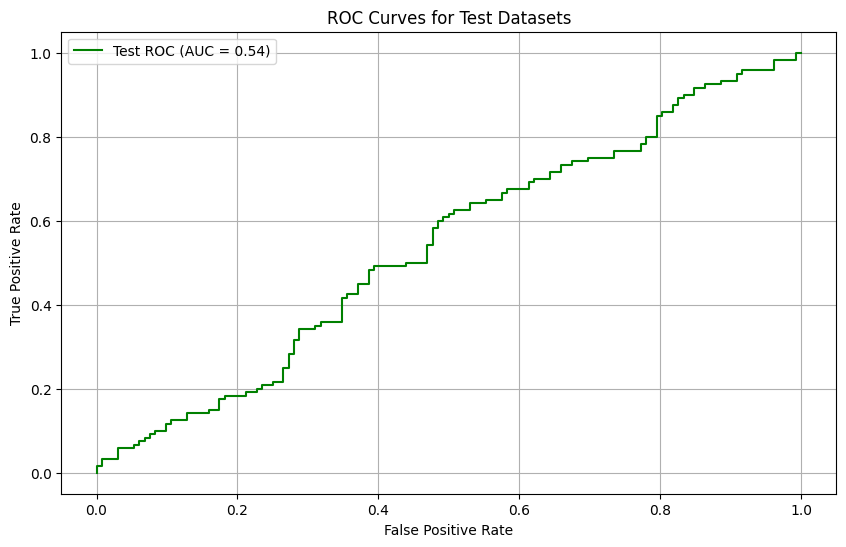

In [30]:
from sklearn.metrics import roc_curve, roc_auc_score
# Make predictions and calculate probabilities
y_test_proba = model.predict_proba(X_test)[:, 1]

# Calculate ROC curves
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba)

# Calculate AUC scores
auc_test = roc_auc_score(y_test, y_test_proba)

# Plot ROC curves with AUC scores
plt.figure(figsize=(10, 6))
plt.plot(fpr_test, tpr_test, label=f'Test ROC (AUC = {auc_test:.2f})', color='green')
# plt.plot([0, 1], [0, 1], 'k--')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Test Datasets')
plt.legend(loc='best')
plt.grid(True)
plt.show()

2. Second Method: `Decision  tree` constructs a model in the form of a tree structure to make decisions based on the input features. it follows the below format:
- Tree Structure: The model consists of nodes, branches, and leaf nodes
- Root Node: The top node representing the entire dataset.
- Internal Nodes: Nodes where decisions are made based on feature values.
- Leaf Nodes: Terminal nodes that provide the final classification.
- Splitting Criteria: The algorithm uses metrics like Gini impurity or information gain to decide the best feature to split the data at each node

In [22]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [23]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

In [24]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f'Accuracy: {accuracy:.2f}')
print(f'ROC-AUC: {roc_auc:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.59
ROC-AUC: 0.59
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.57      0.59       132
           1       0.56      0.61      0.58       120

    accuracy                           0.59       252
   macro avg       0.59      0.59      0.59       252
weighted avg       0.59      0.59      0.59       252



This model performs better than the previous model. Both the precision recall value is more than 50% for class 0 and 1. This means it can correctly identified larger positive samples than `Logistic Regression` for both classes. 

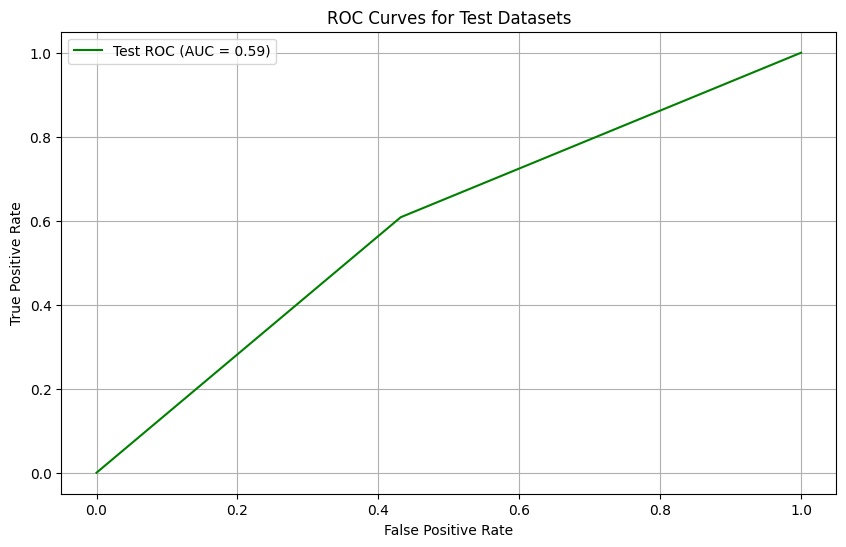

In [25]:
from sklearn.metrics import roc_curve, roc_auc_score
# Make predictions and calculate probabilities
y_test_proba = model.predict_proba(X_test)[:, 1]

# Calculate ROC curves
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba)

# Calculate AUC scores
auc_test = roc_auc_score(y_test, y_test_proba)

# Plot ROC curves with AUC scores
plt.figure(figsize=(10, 6))
plt.plot(fpr_test, tpr_test, label=f'Test ROC (AUC = {auc_test:.2f})', color='green')
# plt.plot([0, 1], [0, 1], 'k--')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Test Datasets')
plt.legend(loc='best')
plt.grid(True)
plt.show()

3. Third method: `Random Forest Classifier` is an ensemble learning method, which means it combines multiple learning algorithms to achieve better predictive performance than any of the individual algorithms alone. Specifically, it uses a collection of decision trees, hence the name "forest."

In [16]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

c:\Users\swati\anaconda3\envs\DS_Projects\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(random_state=42)

In [17]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f'Accuracy: {accuracy:.2f}')
print(f'ROC-AUC: {roc_auc:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.64
ROC-AUC: 0.69
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.66      0.66       132
           1       0.62      0.62      0.62       120

    accuracy                           0.64       252
   macro avg       0.64      0.64      0.64       252
weighted avg       0.64      0.64      0.64       252



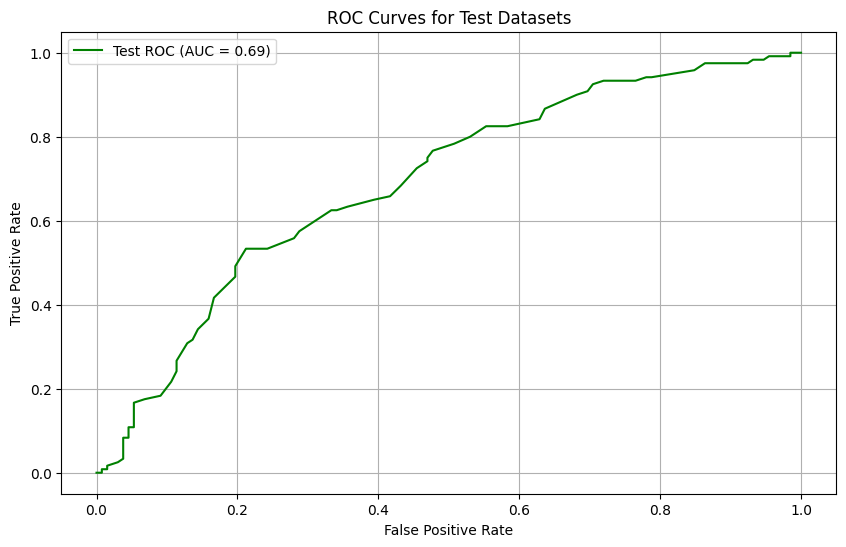

In [19]:
from sklearn.metrics import roc_curve, roc_auc_score
# Make predictions and calculate probabilities
y_test_proba = model.predict_proba(X_test)[:, 1]

# Calculate ROC curves
# fpr_train, tpr_train, _ = roc_curve(y_train, y_train_proba)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba)

# Calculate AUC scores
auc_test = roc_auc_score(y_test, y_test_proba)

# Plot ROC curves with AUC scores
plt.figure(figsize=(10, 6))
plt.plot(fpr_test, tpr_test, label=f'Test ROC (AUC = {auc_test:.2f})', color='green')
# plt.plot([0, 1], [0, 1], 'k--')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Test Datasets')
plt.legend(loc='best')
plt.grid(True)
plt.show()